In [321]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt 
import seaborn as sns 
import plotly as py
import plotly.graph_objs as go

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

In [322]:
df = pd.read_csv('supermarket_sales - Sheet1.csv')

In [323]:
df.head(5)

Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:29         Cash   76.40                 4.761905        3.8200     9.6  
2  13:23  Credit card  324.31                 4.761905       16.2155     7.4  
3  20:33      Ewallet  465.76                 4.761905       23.2880     8.4  
4  10:37      Ewallet  604.17                 4.761905       30.2085     5.3

## Data understanding

In [324]:
df.isnull().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [325]:
df.shape

(1000, 17)

In [326]:
df.describe()

Unit price     Quantity       Tax 5%        Total        cogs  \
count  1000.000000  1000.000000  1000.000000  1000.000000  1000.00000   
mean     55.672130     5.510000    15.379369   322.966749   307.58738   
std      26.494628     2.923431    11.708825   245.885335   234.17651   
min      10.080000     1.000000     0.508500    10.678500    10.17000   
25%      32.875000     3.000000     5.924875   124.422375   118.49750   
50%      55.230000     5.000000    12.088000   253.848000   241.76000   
75%      77.935000     8.000000    22.445250   471.350250   448.90500   
max      99.960000    10.000000    49.650000  1042.650000   993.00000   

       gross margin percentage  gross income      Rating  
count              1000.000000   1000.000000  1000.00000  
mean                  4.761905     15.379369     6.97270  
std                   0.000000     11.708825     1.71858  
min                   4.761905      0.508500     4.00000  
25%                   4.761905      5.924875     5.50000  
50%                   4.761905     12.088000     7.00000  
75%                   4.761905     22.445250     8.50000  
max                   4.761905     49.650000    10.00000

In [327]:
df.dtypes

Invoice ID                  object
Branch                      object
City                        object
Customer type               object
Gender                      object
Product line                object
Unit price                 float64
Quantity                     int64
Tax 5%                     float64
Total                      float64
Date                        object
Time                        object
Payment                     object
cogs                       float64
gross margin percentage    float64
gross income               float64
Rating                     float64
dtype: object

In [7]:
df.duplicated().sum()

0

## Cleaning

In [328]:
# droping useless columns

df.drop("Invoice ID", axis="columns",inplace=True)
df.drop("Date", axis="columns",inplace=True)
df.drop("Time", axis="columns",inplace=True)
df.drop("gross margin percentage", axis="columns",inplace=True)
df.drop("Tax 5%", axis="columns",inplace=True)
df.drop("cogs", axis="columns",inplace=True)
df.drop("gross income", axis="columns",inplace=True)
df.drop("Total", axis="columns",inplace=True)

In [332]:
#creating a list of columns

columns=list(df.columns)
columns

['Branch',
 'City',
 'Customer type',
 'Gender',
 'Product line',
 'Unit price',
 'Quantity',
 'Payment',
 'Rating']

In [333]:
# getting catagorical columns

cat_col=[]
for i in columns:
    if df[i].dtype=='object':
        cat_col.append(i)
        
cat_col

['Branch', 'City', 'Customer type', 'Gender', 'Product line', 'Payment']

In [330]:
# checking the unique values in categorical columns

for i in cat_col:
    print(f"{i}: {len(pd.unique(df[i]))}")

Branch: 3 
City: 3 
Customer type: 2 
Gender: 2 
Product line: 6 
Payment: 3 


In [331]:
# getting numerical columns

num_col=[]
for i in columns:
    if df[i].dtype=='float64' or df[i].dtype=='int64':
        num_col.append(i)

num_col

['Unit price', 'Quantity', 'Rating']


## Label Encoded dataset

In [292]:
df_label_encoded = df[num_col]

In [293]:
#label_enoding categorical columns

label_encoder = LabelEncoder()

# label encoding for each column
for column in cat_col:
    label_encoder = LabelEncoder()
    df_label_encoded[column + '_encoded'] = label_encoder.fit_transform(df[column])

/tmp/ipykernel_5270/2738202389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_encoded[column + '_encoded'] = label_encoder.fit_transform(df[column])
/tmp/ipykernel_5270/2738202389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_label_encoded[column + '_encoded'] = label_encoder.fit_transform(df[column])
/tmp/ipykernel_5270/2738202389.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instea

In [320]:
df_label_encoded.shape

(1000, 12)

In [ ]:
df_label_encoded.columns

In [ ]:
df_label_encoded.head()

## OneHot encoded dataset

In [294]:
df_onehot_encoded = df[cat_col]

df_onehot_encoded = pd.get_dummies(df_onehot_encoded[cat_col])

In [296]:
df_onehot_encoded.shape

(1000, 19)

In [297]:
df_onehot_encoded.columns

Index(['Branch_A', 'Branch_B', 'Branch_C', 'City_Mandalay', 'City_Naypyitaw',
       'City_Yangon', 'Customer type_Member', 'Customer type_Normal',
       'Gender_Female', 'Gender_Male', 'Product line_Electronic accessories',
       'Product line_Fashion accessories', 'Product line_Food and beverages',
       'Product line_Health and beauty', 'Product line_Home and lifestyle',
       'Product line_Sports and travel', 'Payment_Cash', 'Payment_Credit card',
       'Payment_Ewallet'],
      dtype='object')

In [298]:
# Dummy variable trap: droping one encoded_column of each column 

df_onehot_encoded.drop("Branch_A", axis="columns",inplace=True)
df_onehot_encoded.drop("City_Mandalay", axis="columns",inplace=True)
df_onehot_encoded.drop("Customer type_Member", axis="columns",inplace=True)
df_onehot_encoded.drop("Gender_Female", axis="columns",inplace=True)
df_onehot_encoded.drop("Product line_Electronic accessories", axis="columns",inplace=True)
df_onehot_encoded.drop("Payment_Cash", axis="columns",inplace=True)

In [299]:
# adding numerical column to onehot dataset

for col in columns:
    df_onehot_encoded[col] = df[col]

In [300]:
df_onehot_encoded.shape

(1000, 16)

In [301]:
df_onehot_encoded.head()

Branch_B  Branch_C  City_Naypyitaw  City_Yangon  Customer type_Normal  \
0     False     False           False         True                 False   
1     False      True            True        False                  True   
2     False     False           False         True                  True   
3     False     False           False         True                 False   
4     False     False           False         True                  True   
5     False      True            True        False                  True   
6     False     False           False         True                 False   
7     False      True            True        False                  True   
8     False     False           False         True                 False   
9      True     False           False        False                 False   

   Gender_Male  Product line_Fashion accessories  \
0        False                             False   
1        False                             False   
2         True                             False   
3         True                             False   
4         True                             False   
5         True                             False   
6        False                             False   
7        False                             False   
8        False                             False   
9        False                             False   

   Product line_Food and beverages  Product line_Health and beauty  \
0                            False                            True   
1                            False                           False   
2                            False                           False   
3                            False                            True   
4                            False                           False   
5                            False                           False   
6                            False                           False   
7                            False                           False   
8                            False                            True   
9                             True                           False   

   Product line_Home and lifestyle  Product line_Sports and travel  \
0                            False                           False   
1                            False                           False   
2                             True                           False   
3                            False                           False   
4                            False                            True   
5                            False                           False   
6                            False                           False   
7                             True                           False   
8                            False                           False   
9                            False                           False   

   Payment_Credit card  Payment_Ewallet  Unit price  Quantity  Rating  
0                False             True       74.69         7     9.1  
1                False            False       15.28         5     9.6  
2                 True            False       46.33         7     7.4  
3                False             True       58.22         8     8.4  
4                False             True       86.31         7     5.3  
5                False             True       85.39         7     4.1  
6                False             True       68.84         6     5.8  
7                False             True       73.56        10     8.0  
8                 True            False       36.26         2     7.2  
9                 True            False       54.84         3     5.9

## Scaling numerical columns

In [303]:
#scaling label encoder

data_to_scale = df_label_encoded[num_col]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_scale)
df_label_encoded[num_col] = standardized_data

In [306]:
#scaling onehot encoder

data_to_scale = df_onehot_encoded[col]

scaler = StandardScaler()
standardized_data = scaler.fit_transform(data_to_scale)
df_onehot_encoded[col] = standardized_data

In [ ]:
df_label_encoded.head()

In [307]:
df_onehot_encoded.head()

     Branch_B  Branch_C  City_Naypyitaw  City_Yangon  Customer type_Normal  \
0       False     False           False         True                 False   
1       False      True            True        False                  True   
2       False     False           False         True                  True   
3       False     False           False         True                 False   
4       False     False           False         True                  True   
..        ...       ...             ...          ...                   ...   
995     False      True            True        False                  True   
996      True     False           False        False                  True   
997     False     False           False         True                 False   
998     False     False           False         True                  True   
999     False     False           False         True                 False   

     Gender_Male  Product line_Fashion accessories  \
0        

## EDA

Frequency Histograms

KeyError: 'Total'

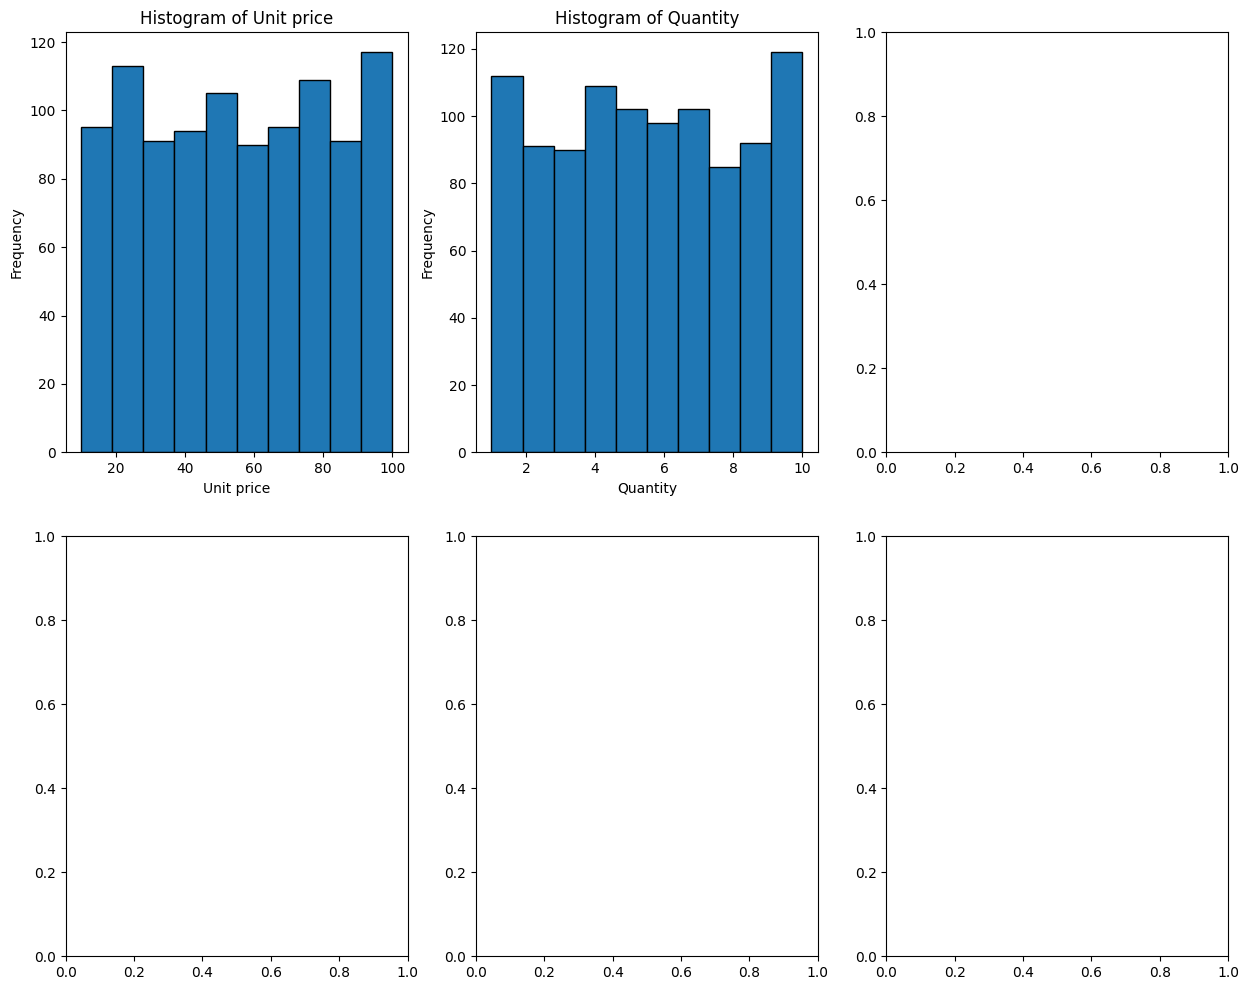

In [334]:
fig, axs = plt.subplots(2, 3, figsize=(15, 12))

for i, variable in enumerate(df_label_encoded):
    row = i // 3  # Calculate the row index
    col = i % 3   # Calculate the column index
    axs[row, col].hist(df[variable], bins=10, edgecolor='black')
    axs[row, col].set_title(f'Histogram of {variable}')
    axs[row, col].set_xlabel(variable)
    axs[row, col].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

Box plots and swarm plot

/home/lucifer/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 14.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lucifer/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 26.5% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lucifer/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 19.4% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lucifer/.local/lib/python3.10/site-packages/seaborn/categorical.py:3544: UserWarning: 25.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)
/home/lucifer/.local/lib/python3.10/site-packages/seaborn/categorical.py:354

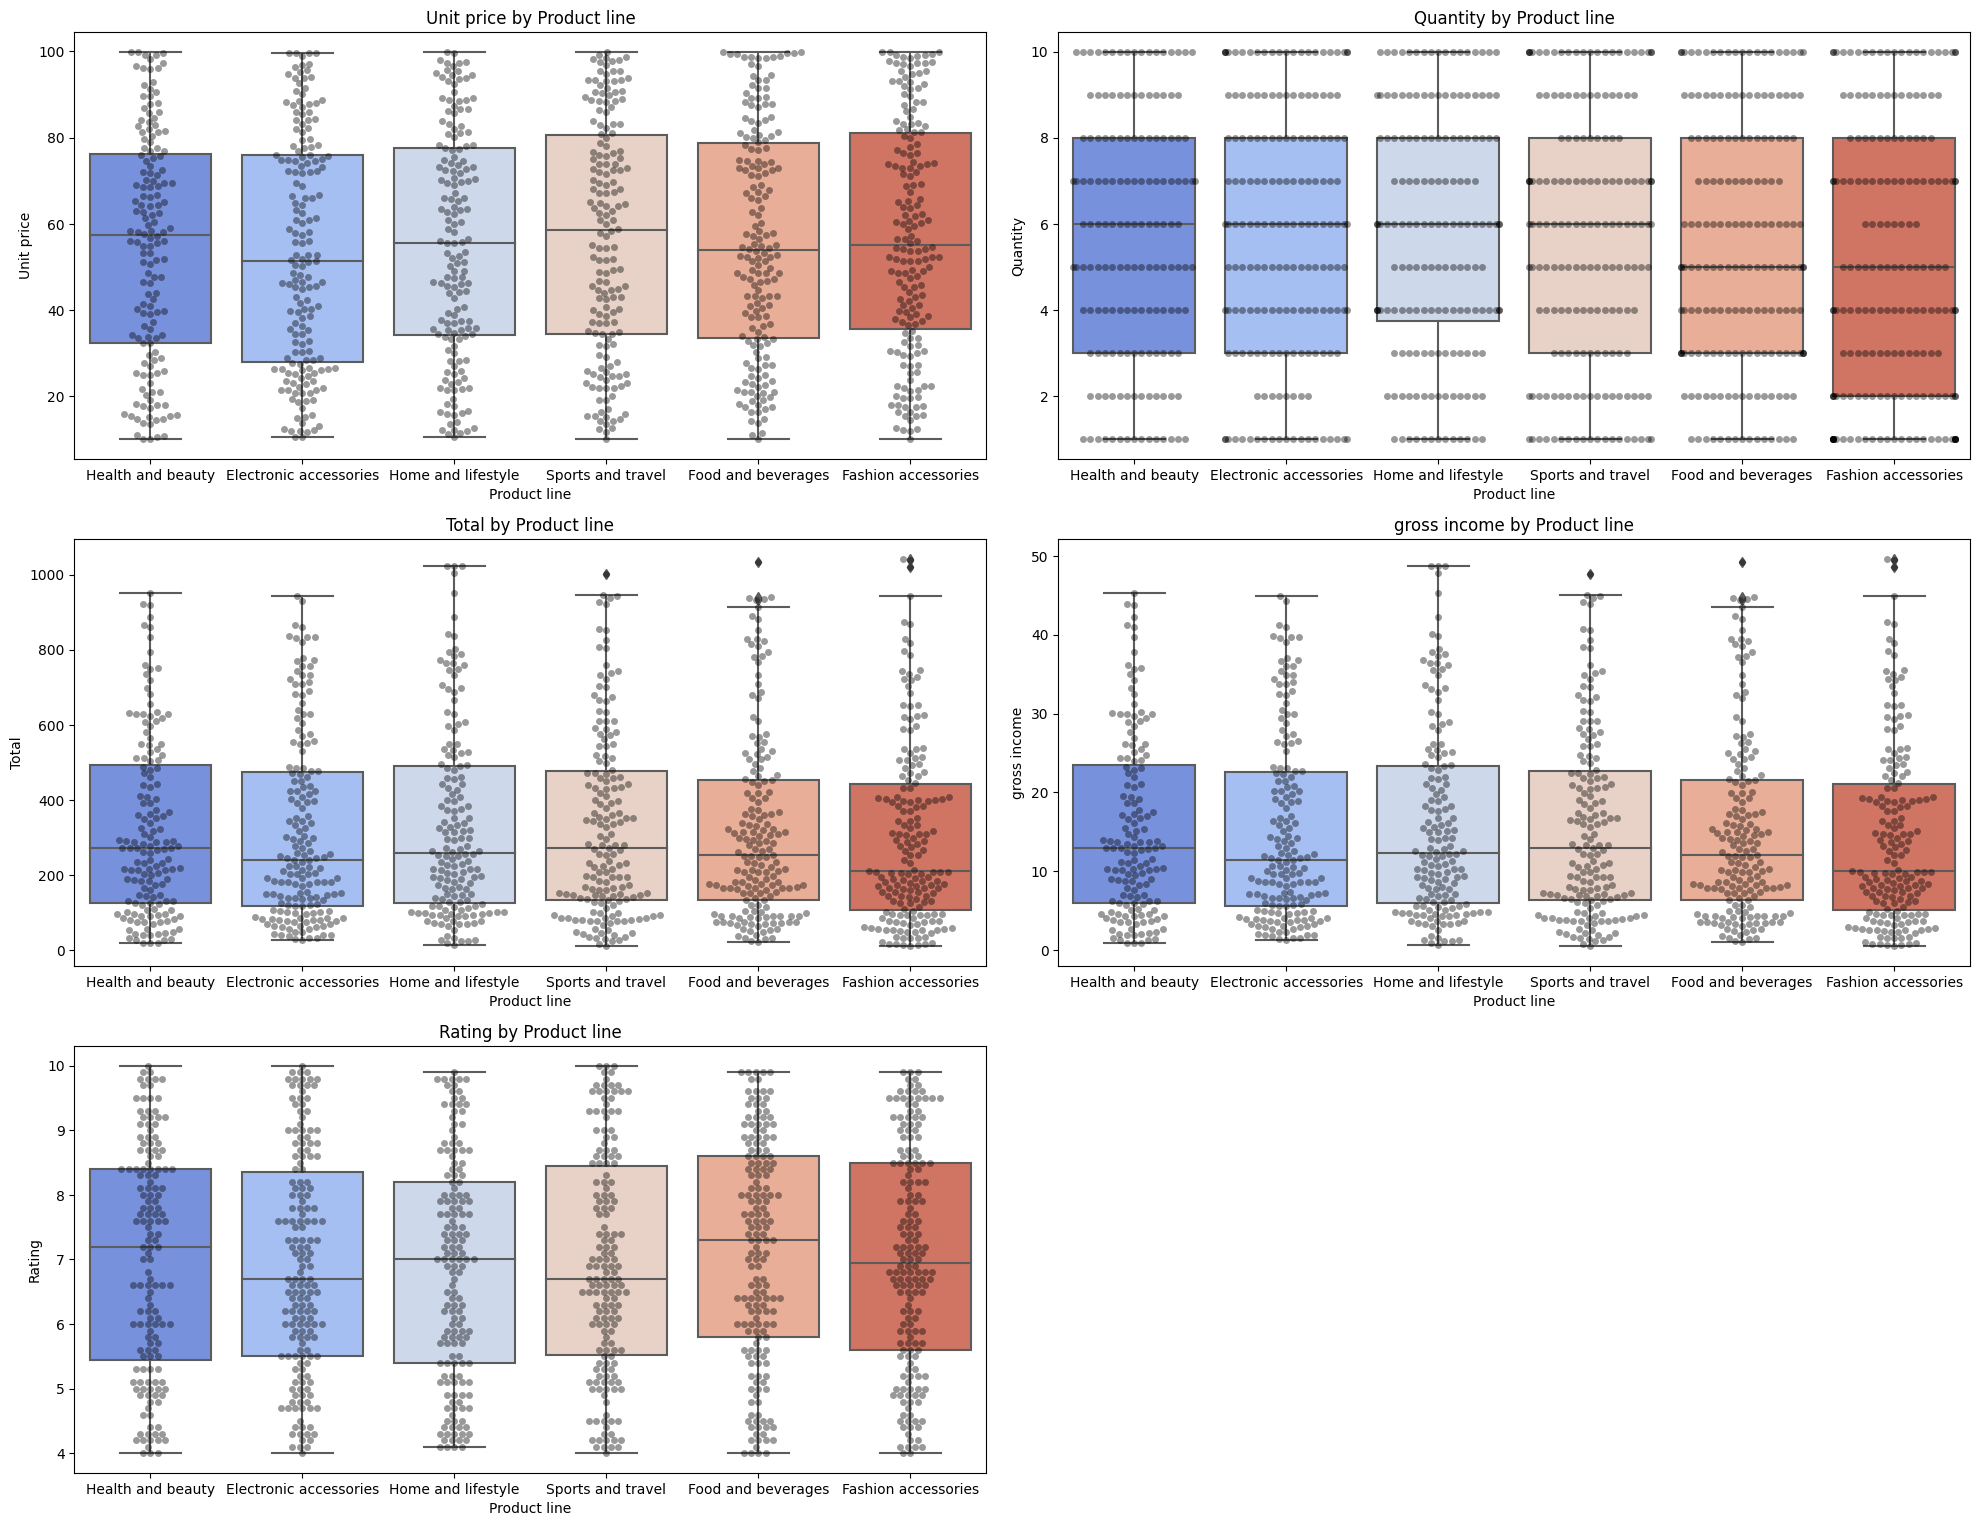

In [65]:
plt.figure(figsize=(20, 20))

for i, column in enumerate(num_col):
    plt.subplot(len(columns), 2, i + 1)
    sns.boxplot(x='Product line', y=column, data=df, palette='coolwarm')
    sns.swarmplot(x='Product line', y=column, data=df, color='black', alpha=0.4)
    plt.title(f'{column} by Product line')
plt.tight_layout()

plt.show()

Correlation Matrix

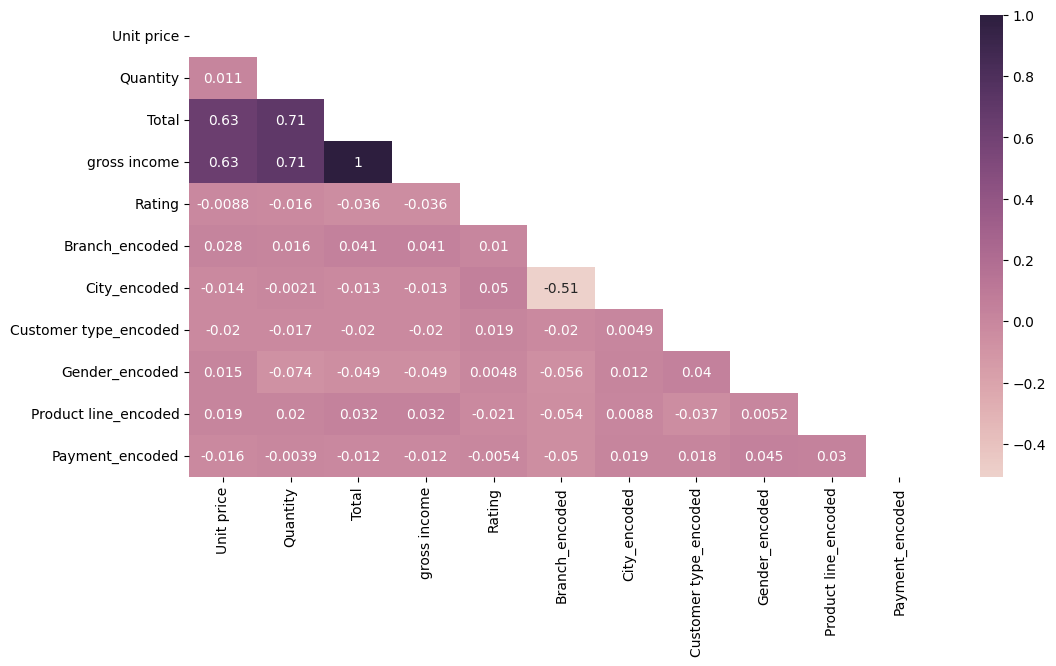

In [99]:
plt.figure(figsize=(12, 6)) 

mask = np.triu(np.ones_like(df_encoded.corr()))
dataplot = sns.heatmap(df_encoded.corr(), mask=mask, annot=True, cmap=sns.cubehelix_palette(as_cmap=True))

plt.show()

Pair plot

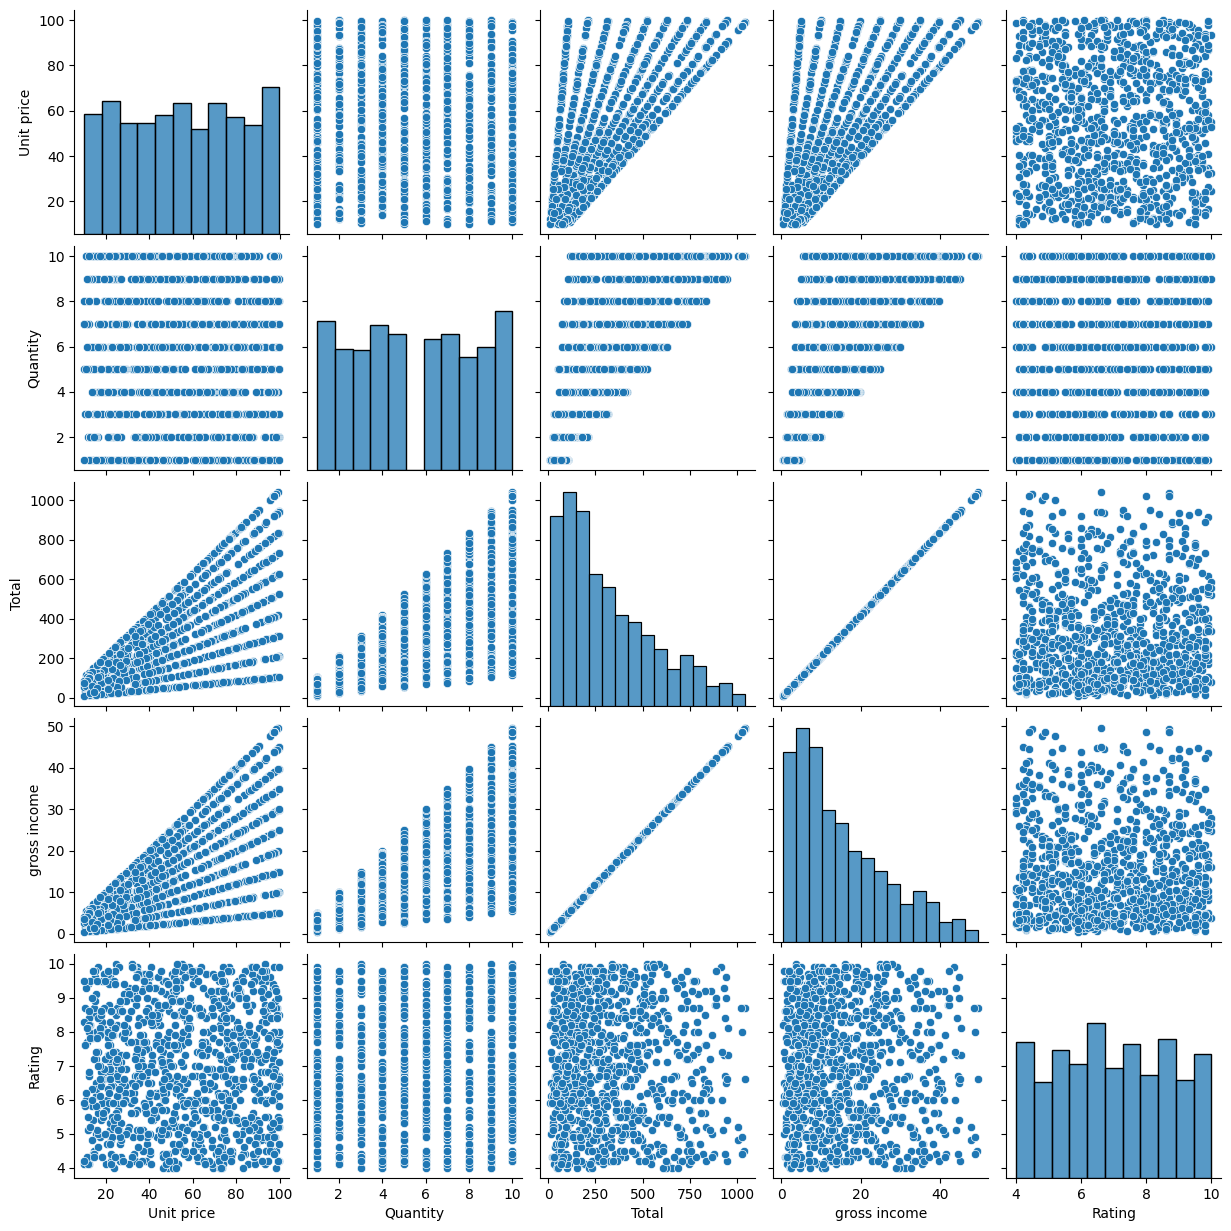

In [100]:
sns.pairplot(df[num_col])

plt.show()

## Elbow Plot

In [73]:
sse = []

k_rng = range(1,10)

for k in k_rng:
    km = KMeans(n_clusters=k)
    km.fit(df_onehot_encoded)
    sse.append(km.inertia_)

/home/lucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)
/home/lucifer/.local/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning: The default value of `n_init` will change from 10 to 'au

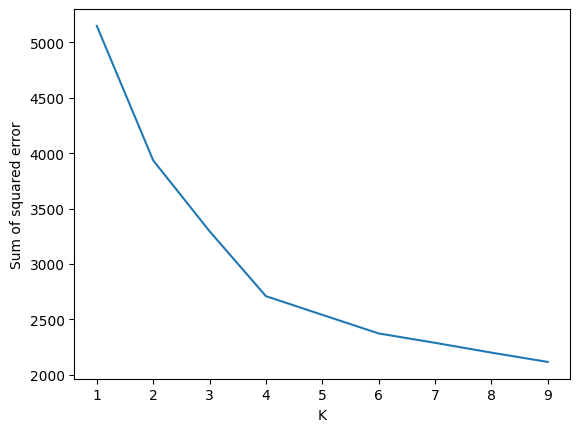

In [74]:
plt.xlabel('K')
plt.ylabel('Sum of squared error')
plt.plot(k_rng,sse)

## KMEANS MODEL

In [309]:
km = KMeans(n_clusters=4, n_init=5)
y_predicted = km.fit_predict(df_onehot_encoded)

In [312]:
df_onehot_encoded['Cluster']=y_predicted
df_label_encoded['Cluster']=y_predicted
df['Cluster']=y_predicted

In [313]:
km.cluster_centers_

array([[ 0.3030303 ,  0.33712121,  0.33712121,  0.35984848,  0.50378788,
         0.48863636,  0.15909091,  0.16666667,  0.17424242,  0.17045455,
         0.13257576,  0.30681818,  0.34469697, -0.79724297,  0.55270958,
         0.7630072 ],
       [ 0.30165289,  0.32644628,  0.32644628,  0.37190083,  0.52066116,
         0.52066116,  0.18595041,  0.2107438 ,  0.15702479,  0.11983471,
         0.18595041,  0.28099174,  0.33471074,  0.94235324, -0.52101749,
         0.68851231],
       [ 0.37984496,  0.29844961,  0.29844961,  0.32170543,  0.50387597,
         0.53488372,  0.20542636,  0.16666667,  0.12790698,  0.17054264,
         0.17054264,  0.34108527,  0.3255814 , -0.60273152, -0.86829539,
        -0.6567577 ],
       [ 0.34322034,  0.35169492,  0.35169492,  0.30508475,  0.46610169,
         0.44915254,  0.16101695,  0.15254237,  0.14830508,  0.1779661 ,
         0.1779661 ,  0.31355932,  0.37711864,  0.58443809,  0.86521658,
        -0.84156946]])

## Visualizing KMEANS

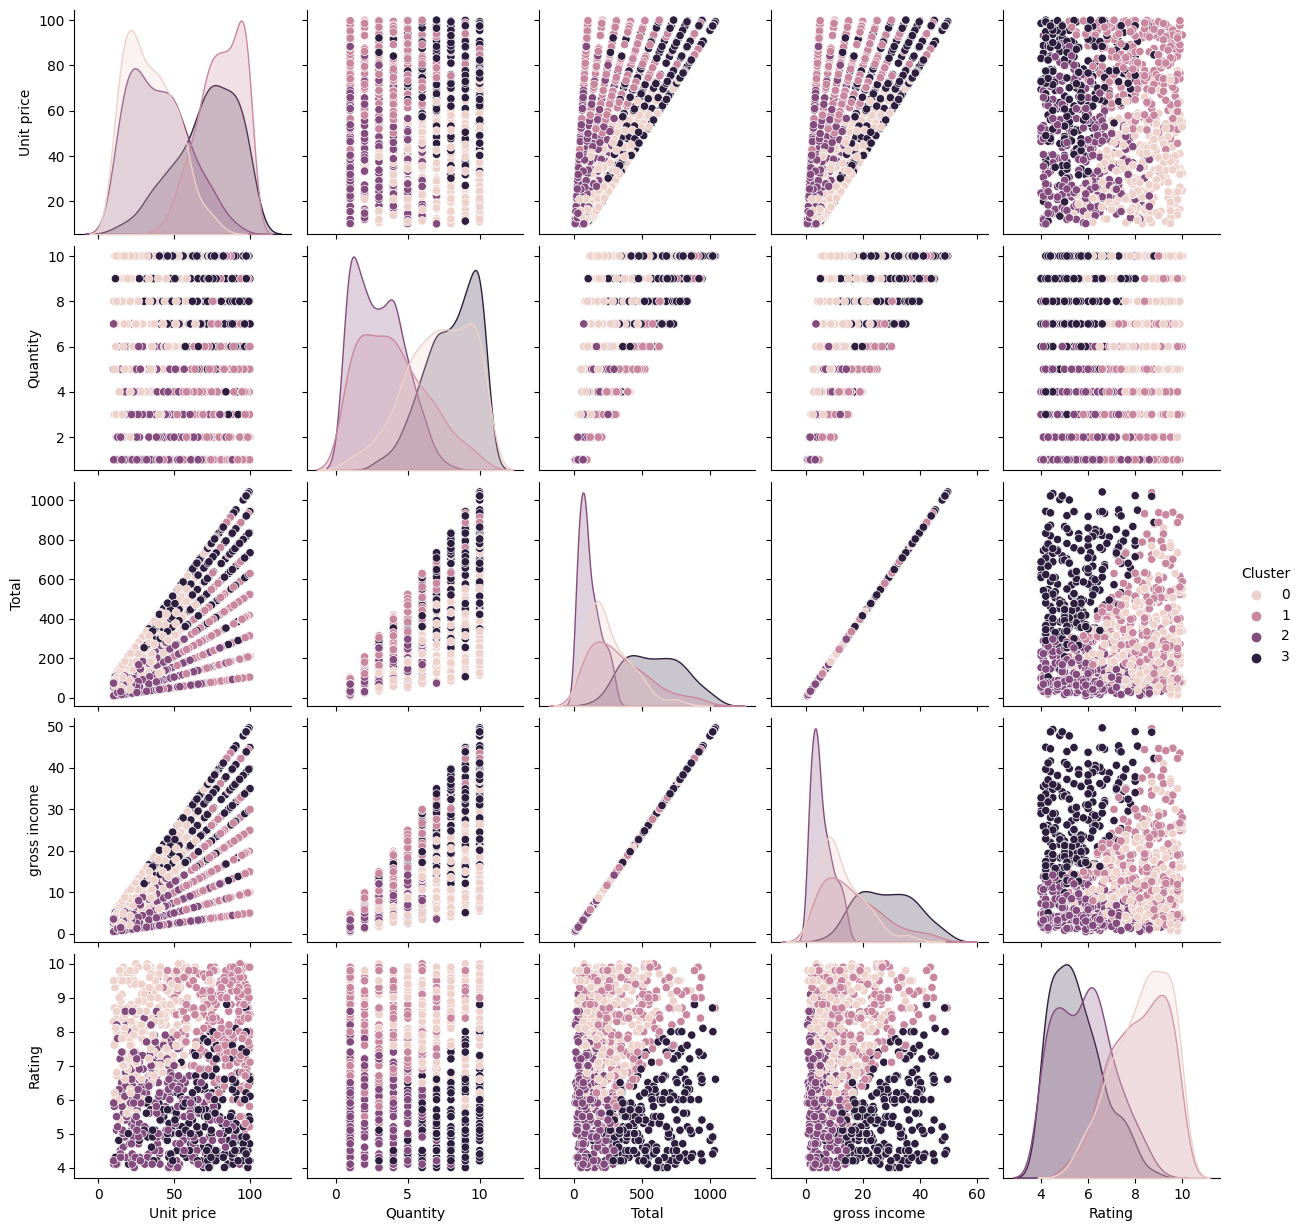

In [314]:
sns.pairplot(
    df,
    hue="Cluster"
)

plt.show()

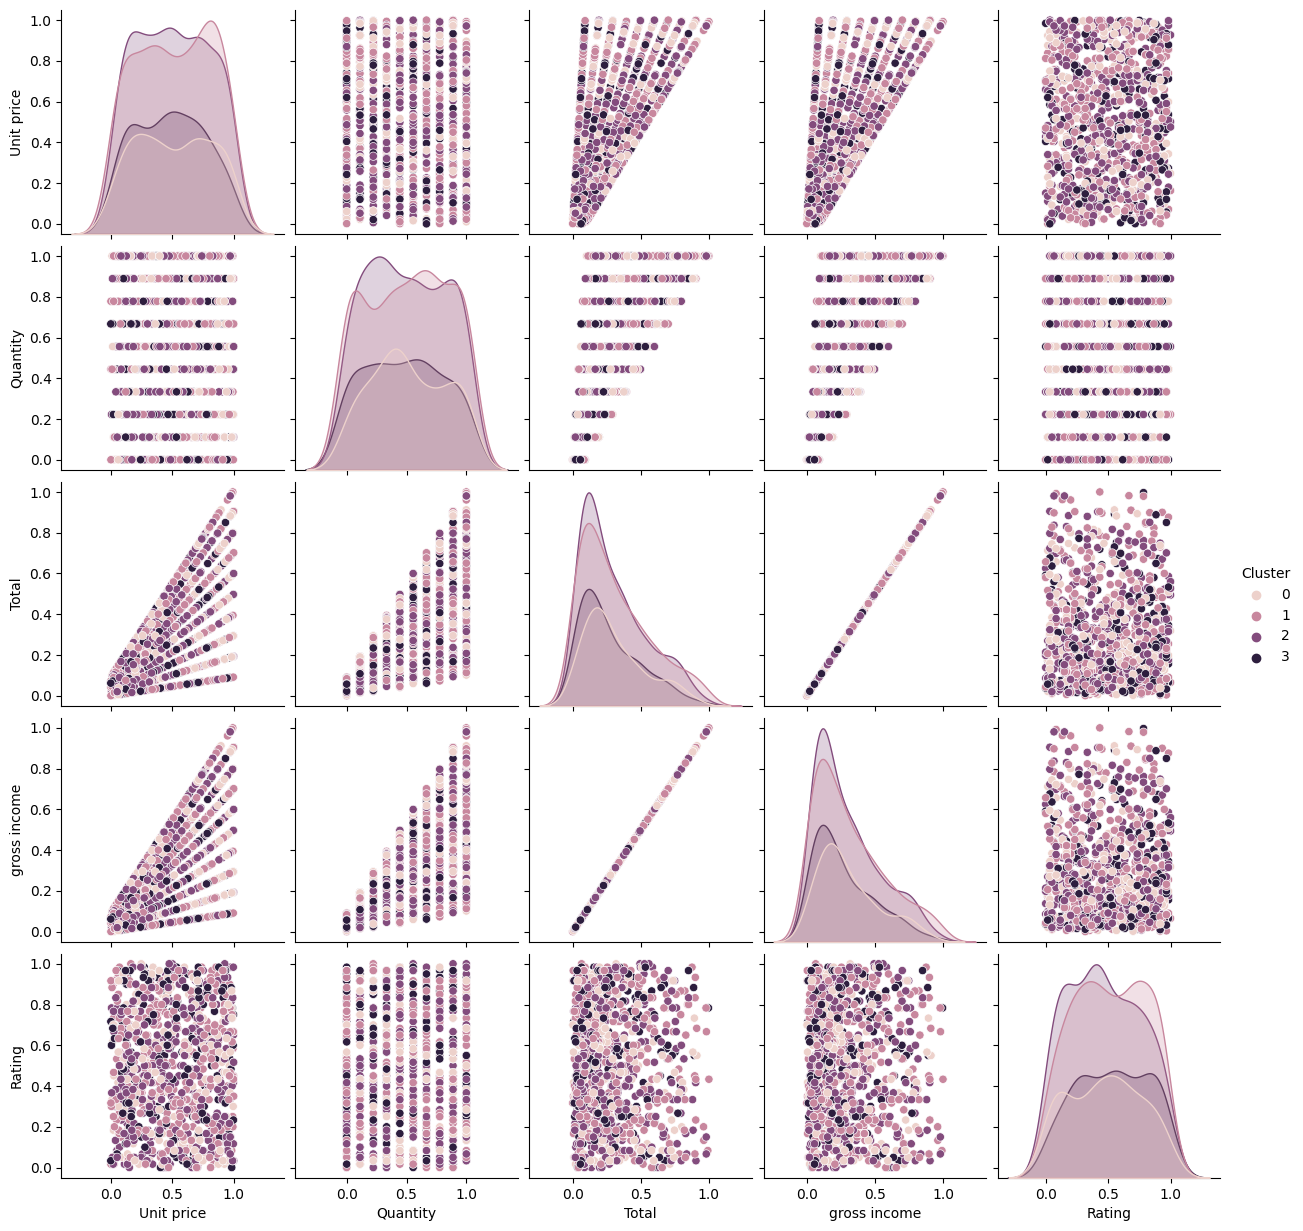

In [253]:
sns.pairplot(
    df_label_encoded,
    x_vars=num_col,
    y_vars=num_col,
    hue="Cluster"
)

plt.show()

## Hierercial Level Weighted

In [221]:
# for numerical_col

for i in num_col:
    print(f"{i}: {len(pd.unique(df[i]))} ")

Unit price: 943 
Quantity: 10 
Total: 990 
gross income: 990 
Rating: 61 


In [222]:
import pandas as pd

result_dict = {}

for i in cat_col:
    value_counts_dict = df[i].value_counts().to_dict()
    result_dict[i] = value_counts_dict

result_dict

{'Branch': {'A': 340, 'B': 332, 'C': 328}, 'City': {'Yangon': 340, 'Mandalay': 332, 'Naypyitaw': 328}, 'Customer type': {'Member': 501, 'Normal': 499}, 'Gender': {'Female': 501, 'Male': 499}, 'Product line': {'Fashion accessories': 178, 'Food and beverages': 174, 'Electronic accessories': 170, 'Sports and travel': 166, 'Home and lifestyle': 160, 'Health and beauty': 152}, 'Payment': {'Ewallet': 345, 'Cash': 344, 'Credit card': 311}}


In [242]:
# creating a value chain

values_list = []

for index, row in df.iterrows():
    value = 0
    for i in df:
        if df[i].dtype == 'object':
            value += (result_dict[i][row[i]]) / 100

        if df[i].dtype == 'float64' or df[i].dtype == 'int64':
            value += row[i]
            
    values_list.append(value)

[2750.772, 542.4799999999999, 1755.844, 2434.904, 3140.348, 3102.732, 2227.8160000000003, 3689.32, 586.728, 1064.888, 434.32800000000003, 681.336, 1356.9, 2233.8000000000006, 3576.080000000001, 2978.128, 2530.964, 2345.144, 1073.2440000000001, 628.1999999999999, 2363.08, 1632.016, 535.88, 1045.8799999999999, 1648.076, 2213.648, 399.728, 1247.7359999999999, 2443.0400000000004, 1237.7639999999997, 2572.62, 3544.812, 3423.4559999999997, 1350.2640000000001, 2280.552, 690.168, 1763.7599999999998, 2796.9680000000003, 2301.384, 1330.224, 850.888, 837.808, 2234.688, 4018.4800000000005, 319.61600000000004, 2170.7360000000003, 2626.364, 1012.236, 717.672, 4125.080000000001, 3333.6800000000003, 1301.34, 515.552, 243.81200000000004, 327.528, 3522.0160000000005, 686.1120000000001, 3657.7200000000003, 3621.8399999999997, 1078.464, 562.928, 1832.552, 2564.1320000000005, 919.56, 1768.784, 912.0, 549.336, 3118.504, 3934.0800000000004, 262.292, 4458.999999999999, 3132.4, 949.9439999999998, 2453.26400000

In [246]:
# sorting df according to the value chain 

sorted_df = df.sort_values(by="value")

In [248]:
# ranking according to quartiles
q1 = sorted_df["value"].quantile(0.25)
q2 = sorted_df["value"].quantile(0.5)
q3 = sorted_df["value"].quantile(0.75)

def assign_category(value):
    if value <= q1:
        return 1
    elif value <= q2:
        return 2
    elif value <= q3:
        return 3
    else:
        return 4

sorted_df["rank"] = sorted_df["value"].apply(assign_category)

In [250]:
sorted_df.head()

    Branch       City Customer type  Gender         Product line  Unit price  \
429      A     Yangon        Member  Female   Home and lifestyle       90.65   
357      C  Naypyitaw        Normal  Female    Sports and travel       95.44   
166      C  Naypyitaw        Normal    Male   Home and lifestyle       95.58   
996      B   Mandalay        Normal  Female   Home and lifestyle       97.38   
792      B   Mandalay        Normal  Female   Home and lifestyle       97.37   
422      C  Naypyitaw        Member  Female  Fashion accessories       97.21   
699      C  Naypyitaw        Normal    Male   Home and lifestyle       97.50   
557      C  Naypyitaw        Member  Female   Food and beverages       98.52   
167      A     Yangon        Normal    Male  Fashion accessories       98.98   
350      C  Naypyitaw        Member  Female  Fashion accessories       99.30   

     Quantity     Total      Payment  gross income  Rating    value  rank  
429        10   951.825      Ewallet       

## Visualizing Hierercial Level Weighted results

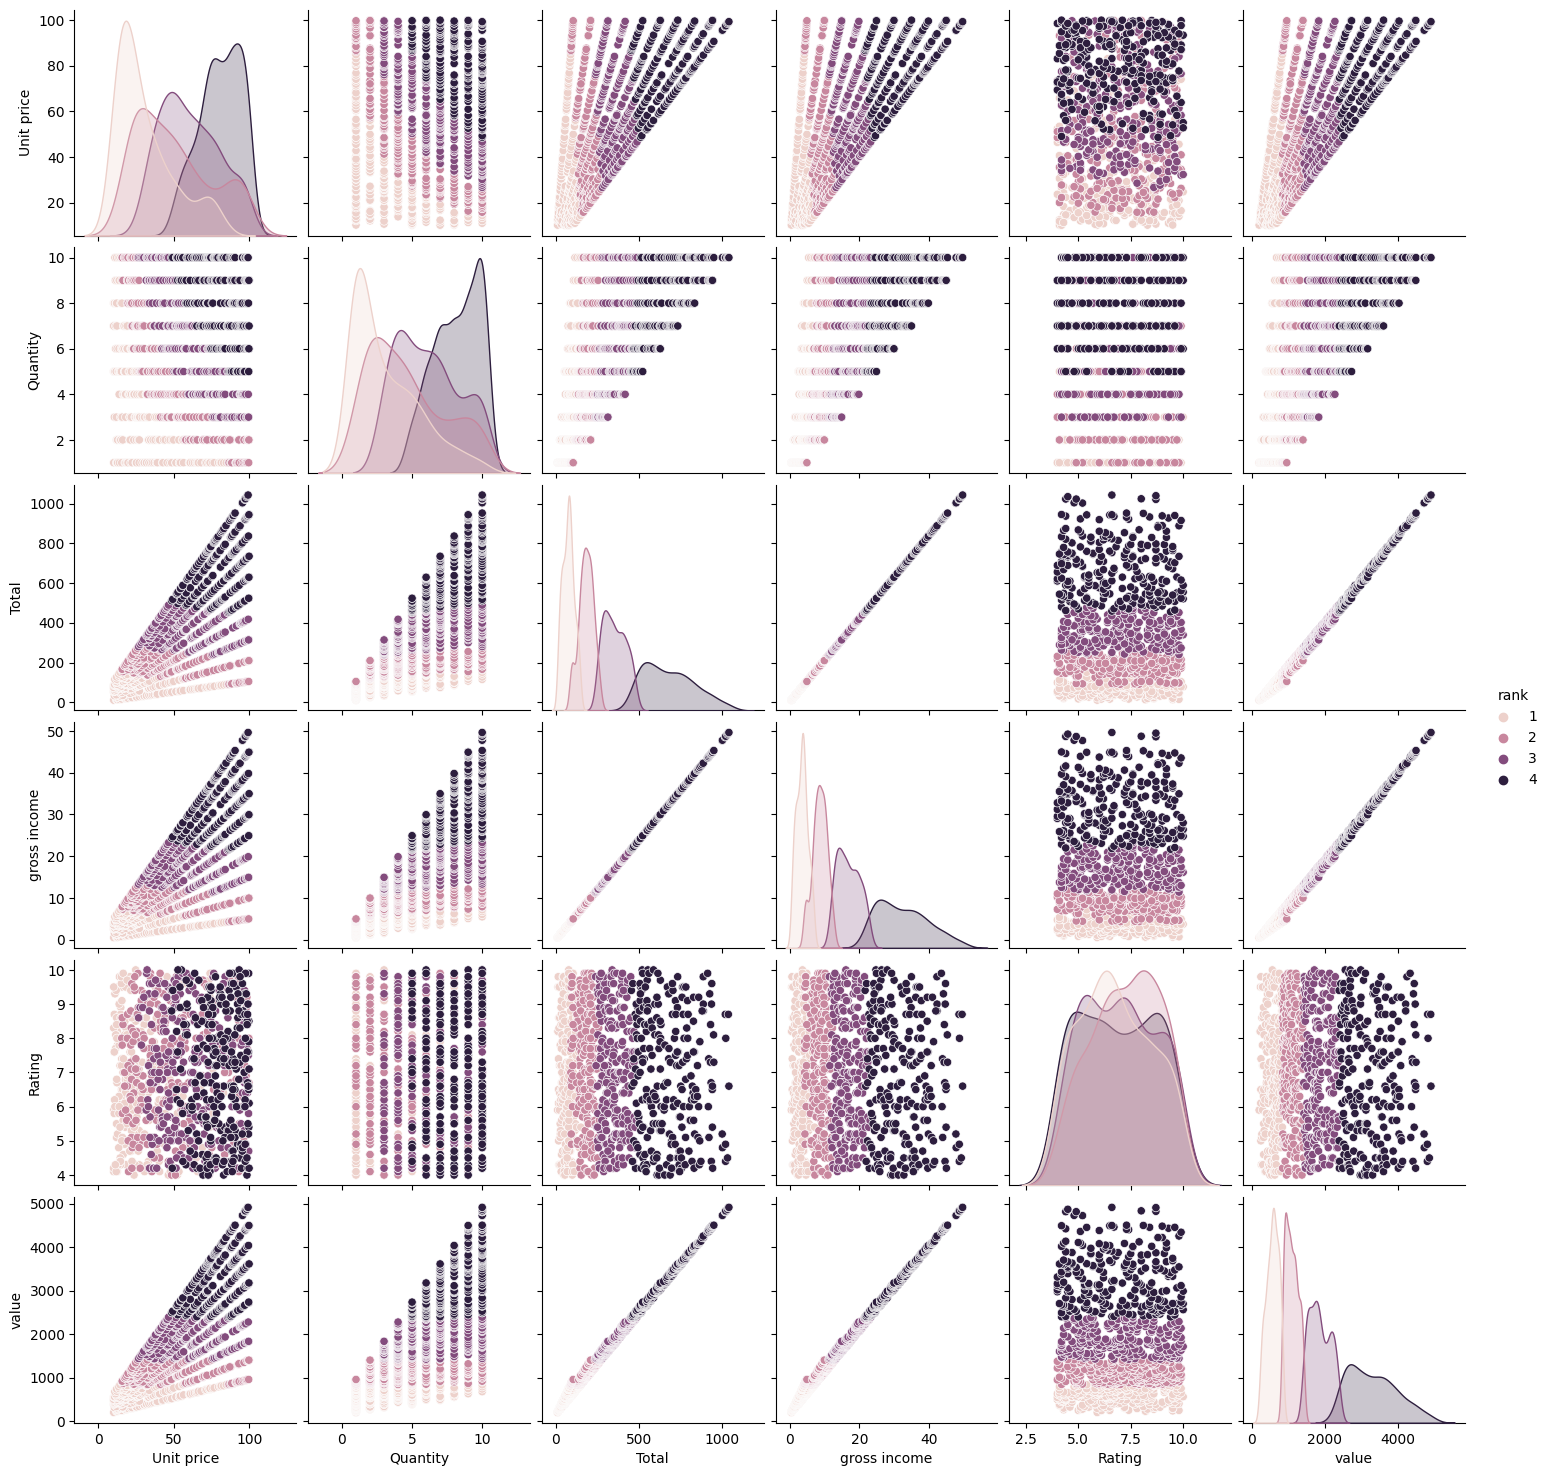

In [251]:
sns.pairplot(
    sorted_df,
    hue="rank"
)

plt.show()